# 简单的例子

<span style="float: left">Prev: <a href="./index.html">乘车指南 🚇</a></span>
<span style="float: right">Next: <a href="./objects.html">Jike Metro 🚇 中各个类的可用属性</a></span>

In [1]:
import jike
c = jike.JikeClient()

## 获取瓦总和不管姐粉丝性别百分比

想法来自 [劳斯判据](https://web.okjike.com/user/c7d257c7-a4fc-4383-a779-49f3123adfab/post) 的 [动态](https://web.okjike.com/post-detail/5ac0a1dee72e500017c5e47f/originalPost)

In [2]:
# 瓦总
ceo_follower = c.get_user_follower(username='82D23B32-CF36-4C59-AD6F-D05E3552CBF3')
ceo_follower

List(20 items)

In [3]:
ceo_follower.load_all()

19956

In [4]:
# 不管姐
boss_follower = c.get_user_follower(username='B5C00109-15EA-4351-8B93-E58651E8C39D')
boss_follower.load_all()

4388

In [5]:
ceo_male_fan_count = sum((follower.gender == 'MALE' for follower in ceo_follower))
ceo_female_fan_count = sum((follower.gender == 'FEMALE' for follower in ceo_follower))
ceo_other_fan_count = sum(follower.gender == None for follower in ceo_follower)
print(ceo_male_fan_count, ceo_female_fan_count, ceo_other_fan_count)

12794 4070 3092


In [6]:
boss_male_fan_count = sum((follower.gender == 'MALE' for follower in boss_follower))
boss_female_fan_count = sum((follower.gender == 'FEMALE' for follower in boss_follower))
boss_other_fan_count = sum(follower.gender == None for follower in boss_follower)
print(boss_male_fan_count, boss_female_fan_count, boss_other_fan_count)

2844 1163 381


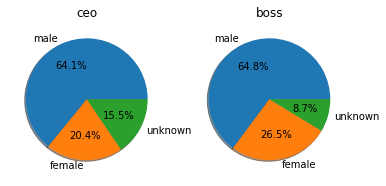

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

labels = 'male', 'female', 'unknown'
ceo_stats = (ceo_male_fan_count, ceo_female_fan_count, ceo_other_fan_count)
boss_stats = (boss_male_fan_count, boss_female_fan_count, boss_other_fan_count)

the_grid = GridSpec(1, 2)
plt.subplot(the_grid[0, 0], aspect=1)
plt.title('ceo')
plt.pie(ceo_stats, labels=labels, autopct='%1.1f%%', shadow=True)
plt.subplot(the_grid[0, 1], aspect=1)
plt.title('boss')
plt.pie(boss_stats, labels=labels, autopct='%1.1f%%', shadow=True)

## 店长发车的时间分布

基于最近一个月 [不好笑便利店](https://web.okjike.com/topic/5701d10d5002b912000e588d/official) 主题下的精选，由评论判断是否开车

In [8]:
# 不好笑便利店 的主题精选
selected = c.get_topic_selected(topic_id='5701d10d5002b912000e588d')

In [9]:
from datetime import datetime, timedelta
today = datetime.today()
a_month_ago = today - timedelta(days=30)
date_parse = lambda t: datetime.strptime(t[:-5], '%Y-%m-%dT%H:%M:%S')

In [10]:
comment_keywords = {'奶', '任务', '爱尔兰', '不动产', '发车', '开车', '上车', '窑子', '黄色', '黄即', 
                    '片子', '看片', '借一部', '资源', '举报'}

In [11]:
from collections import defaultdict
time_periods = defaultdict(int)

In [12]:
message_date = today
while message_date > a_month_ago:
    messages = selected.load_more(limit=100)
    for message in messages:
        message_date = date_parse(message.createdAt)
        comments = c.get_comment(message)
        comments.load_full()
        for comment in comments:
            if any((keyword in comment.content for keyword in comment_keywords)):
                time_periods[message_date.hour] += 1

In [13]:
# UTC time, should +8 for Asia/Shanghai
adjusted_time_periods = [((h+8)%24, time_periods[h]) for h in range(24)]

In [14]:
adjusted_time_periods = adjusted_time_periods[-8:] + adjusted_time_periods[:-8]
adjusted_time_periods

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 13),
 (9, 20),
 (10, 8),
 (11, 20),
 (12, 33),
 (13, 30),
 (14, 42),
 (15, 71),
 (16, 17),
 (17, 37),
 (18, 41),
 (19, 31),
 (20, 41),
 (21, 38),
 (22, 18),
 (23, 2)]

店长最可能发车的三个时间段

In [15]:
total_cnt = sum((cnt for _, cnt in adjusted_time_periods))

drive_time = sorted(adjusted_time_periods, key=lambda t: t[1], reverse=True)[:3]
for period, cnt in drive_time:
    print('发车时间: {}点，发车概率: {:.2%}'.format(period, cnt / total_cnt))

发车时间: 15点，发车概率: 15.37%
发车时间: 14点，发车概率: 9.09%
发车时间: 18点，发车概率: 8.87%


店长发车的时间分布

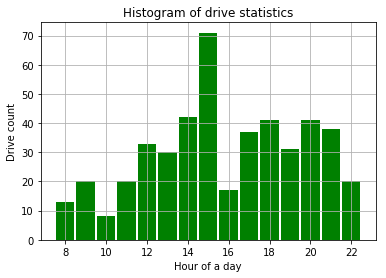

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

data = []
for h, cnt in adjusted_time_periods:
    data.extend([h]*cnt)
plt.hist(data, max(data)-min(data), facecolor='g', align='left', histtype='bar', rwidth=0.9)
plt.xlabel('Hour of a day')
plt.ylabel('Drive count')
plt.title('Histogram of drive statistics')
plt.grid(True)
plt.show()

## 生成⎡推荐关注⎦和⎡我关注的主题⎦对应关键词集的词云

即刻Web端首页右侧栏的推荐关注

In [17]:
recommended_topics = c.get_recommended_topic()

加载至少200个推荐的主题

In [18]:
while len(recommended_topics) < 200:
    recommended_topics.load_more()

In [19]:
recommended_topics

List(217 items)

给我推荐的前五个主题的关键词

In [20]:
for topic in recommended_topics[:5]:
    print(topic.keywords)

单车 租赁 自行车 租赁 o2o ofo 骑行 mobike 共享单车
美团 人人网 饭否 bat 马化腾 马云 李彦宏 张一鸣 大众点评 o2o 龙岩
穿搭 搭配 服装 时尚
网易云音乐 网易 网易云 云音乐 营销
二次元 动漫 新番 动画 漫画 魔王 动漫头像


我自己关注的主题

In [21]:
my_subscribed_topics = c.get_user_subscribed_topic(username='WalleMax')
my_subscribed_topics.load_all()

167

自己关注的最近五个主题的关键词

In [22]:
for topic in my_subscribed_topics[:5]:
    print(topic.keywords)

想法 灵感 一个想法 杠精 思考
None
彩虹 合唱 金承志 张志超 神曲 音乐 作品 合唱 古典 搞怪
开箱 晒单 购物 评测
追踪 抓取 内测 邀请码


进行关键词计数

In [23]:
from collections import Counter
recommended_keywords_counter = Counter()
subscribed_keywords_counter = Counter()

In [24]:
for topic in recommended_topics:
    recommended_keywords_counter.update(topic.keywords.split() if topic.keywords else [])

“推荐关注”一共有1164个关键词

In [25]:
len(recommended_keywords_counter)

1164

“推荐关注”中出现频次最高的10个关键词及其对应频数

In [26]:
recommended_keywords_counter.most_common(10)

[('搞笑', 14),
 ('电影', 12),
 ('明星', 10),
 ('综艺', 9),
 ('科技', 9),
 ('娱乐', 8),
 ('鹿晗', 7),
 ('新闻', 6),
 ('李易峰', 6),
 ('日本', 6)]

In [27]:
for topic in my_subscribed_topics:
    subscribed_keywords_counter.update(topic.keywords.split() if topic.keywords else [])

“我关注的主题”一共有953个关键词

In [28]:
len(subscribed_keywords_counter)

953

“我关注的主题”中出现频次最高的10个关键词及其对应频数

In [29]:
subscribed_keywords_counter.most_common(10)

[('阅读', 13),
 ('搞笑', 12),
 ('科普', 11),
 ('热门', 11),
 ('恋爱', 10),
 ('好笑', 10),
 ('新闻', 10),
 ('科技', 9),
 ('哄妹子', 9),
 ('哄', 9)]

好奇，怎么会有 “哄妹子” 呢？ 🤔🤔🤔

-----

基于 [Word Cloud](https://github.com/amueller/word_cloud) 生成关键词词云

In [30]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from wordcloud import WordCloud

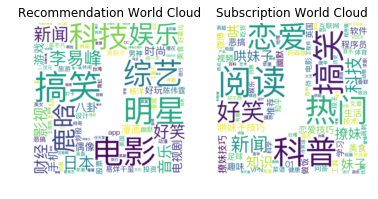

In [31]:
%matplotlib inline
mask = np.array(Image.open('jike.png'))
wc = WordCloud(background_color='white', max_words=100, mask=mask, width=1000, height=800,
               relative_scaling=0.3, random_state=42,
              font_path='/System/Library/Fonts/PingFang.ttc')

the_grid = GridSpec(1, 2)
wc.generate_from_frequencies(recommended_keywords_counter)
plt.subplot(the_grid[0, 0], aspect=1)
plt.title('Recommendation World Cloud')
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")

wc.generate_from_frequencies(subscribed_keywords_counter)
plt.subplot(the_grid[0, 1], aspect=1)
plt.title('Subscription World Cloud')
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")

我觉得吧，“推荐关注”词云里那么大的“鹿晗”，“李易峰”，“综艺”，“明星”和我的个人气质不大符合啊 🤔

即刻的推荐系统还有很大的进步空间

-----------

<span style="float: left">Prev: <a href="./index.html">乘车指南 🚇</a></span>
<span style="float: right">Next: <a href="./objects.html">Jike Metro 🚇 中各个类的可用属性</a></span>